# EQUITY BASKET OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Equity Basket Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Homogeneous Basket

All the assets in the basket have the same characteristicsm

In [3]:
numAssets = 5

In [4]:
expiryDate = FinDate(1, 1, 2021)

In [5]:
strikePrice = 100.0

In [6]:
basketCallOption = FinEquityBasketOption(expiryDate,  strikePrice, 
                                         FinOptionTypes.EUROPEAN_CALL, numAssets)

In [7]:
basketPutOption = FinEquityBasketOption(expiryDate,  strikePrice, 
                                        FinOptionTypes.EUROPEAN_PUT, numAssets)

In [7]:
print(basketCallOption)

OBJECT TYPE: FinEquityBasketOption
EXPIRY DATE: FRI 01 JAN 2021
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUM ASSETS: 5


In [8]:
print(basketPutOption)

OBJECT TYPE: FinEquityBasketOption
EXPIRY DATE: FRI 01 JAN 2021
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
NUM ASSETS: 5


## Valuation

In [9]:
valueDate = FinDate(1, 1, 2020)

In [10]:
interestRate = 0.05

In [11]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [12]:
volatility = 0.20
dividendYield = 0.01
stockPrice = 100.0

We examine how the price depends on the stock price

In [13]:
volatilities = np.ones(numAssets) * volatility
dividendYields = np.ones(numAssets) * dividendYield
stockPrices = np.ones(numAssets) * stockPrice

valuesCall = []
valuesPut = []
valuesCallMC = []
valuesPutMC = []

svector = np.linspace(50,150, 100)

for s in svector:

    stockPrices = np.ones(numAssets) * s
    betaVector = np.ones(numAssets) * 0.6
    corrMatrix = betaVectorToCorrMatrix(betaVector)

    vcall = basketCallOption.value(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vput = basketPutOption.value(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    vcallmc = basketCallOption.valueMC(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vputmc = basketPutOption.valueMC(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    valuesCall.append(vcall)
    valuesPut.append(vput)
    valuesCallMC.append(vcallmc)
    valuesPutMC.append(vputmc)


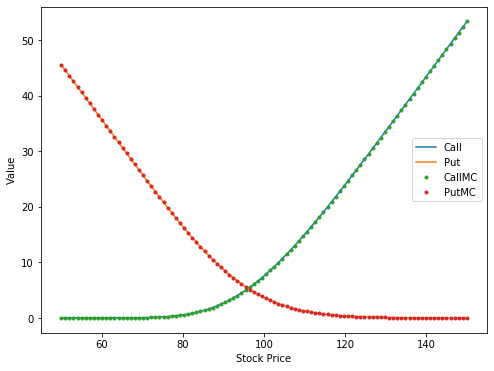

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(svector, valuesCall, label="Call");
plt.plot(svector, valuesPut, label="Put");
plt.plot(svector, valuesCallMC, '.', label="CallMC");
plt.plot(svector, valuesPutMC, '.', label="PutMC");
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend();

We see the usual payoff we would expect and that the Monte Carlo agrees closely with the analytical approach.

## Examining the Role of Correlation

We examine the dependency of the basket option price on the inter-asset correlation.

In [17]:
valuesCall = []
valuesPut = []
valuesCallMC = []
valuesPutMC = []

stockPrice = 100.0
stockPrices = np.ones(numAssets) * stockPrice

betas = np.linspace(0.0, 0.90, 20)

for beta in betas:

    betaVector = np.ones(numAssets) * beta
    corrMatrix = betaVectorToCorrMatrix(betaVector)

    vcall = basketCallOption.value(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vput = basketPutOption.value(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    vcallmc = basketCallOption.valueMC(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vputmc = basketPutOption.valueMC(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    valuesCall.append(vcall)
    valuesPut.append(vput)
    valuesCallMC.append(vcallmc)
    valuesPutMC.append(vputmc)

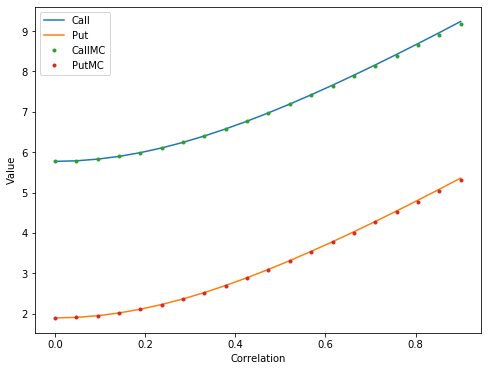

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(betas, valuesCall, label="Call");
plt.plot(betas, valuesPut, label="Put");
plt.plot(betas, valuesCallMC, '.', label="CallMC");
plt.plot(betas, valuesPutMC, '.', label="PutMC");
plt.xlabel("Correlation")
plt.ylabel("Value")
plt.legend();

Both the call and put increase in value with correlation as the effective volatility of the assets increases.

## Heterogenous Basket

Now we examine what happpens if we allow the assets to differ

In [19]:
valuesCallx = []
valuesPutx = []
valuesCallMCx = []
valuesPutMCx = []

# Volatilities differ
volatilities = np.linspace(0.1, 0.3, numAssets)

# Correlations differ
beta = 0.5
betaVector = np.linspace(beta-0.4, beta+0.4, numAssets)
corrMatrix = betaVectorToCorrMatrix(betaVector)

# Dividends differ
dividendYields = np.linspace(0.0, 0.04, numAssets)

svector = np.linspace(50, 150, 100)

for s in svector:

    # initial stock prices differ
    stockPrices = np.linspace(s-50, s+50, numAssets)

    vcall = basketCallOption.value(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vput = basketPutOption.value(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    vcallmc = basketCallOption.valueMC(valueDate, stockPrices, discountCurve, 
                                   dividendYields, volatilities, corrMatrix)
    
    vputmc = basketPutOption.valueMC(valueDate, stockPrices, discountCurve, 
                                 dividendYields, volatilities, corrMatrix)

    valuesCallx.append(vcall)
    valuesPutx.append(vput)
    valuesCallMCx.append(vcallmc)
    valuesPutMCx.append(vputmc)

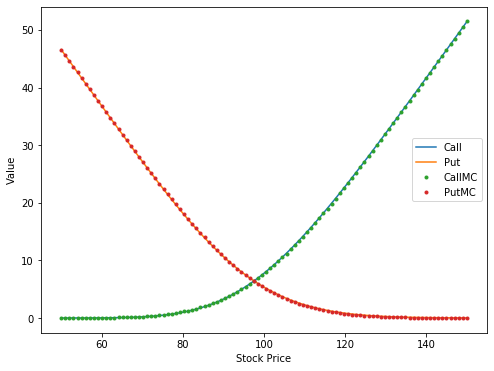

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(svector, valuesCallx, label="Call");
plt.plot(svector, valuesPutx, label="Put");
plt.plot(svector, valuesCallMCx, '.', label="CallMC");
plt.plot(svector, valuesPutMCx, '.', label="PutMC");
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend();

The price dependency does not change significantly as the assets become more heterogenous.

Copyright (c) 2020 Dominic O'Kane